<a href="https://colab.research.google.com/github/parthdasawant/Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNs camparision using Fashion MNIST


> **Assignment Question 3: Image Classification with CNNs** \
Implement a convolutional neural network (CNN) for image classification using a dataset of your choice (e.g., CIFAR-10, Fashion MNIST). The goal is to correctly classify images into predefined categories. Experiment with different architectures, and provide a comparative analysis of model performance. Include documentation explaining the rationale behind your architectural choices and any tuning performed.


The objective of this project is to implement a convolutional neural network (CNN) for image classification using the Fashion MNIST dataset within a Google Colab environment. The primary aim is to accurately classify images of fashion items into predefined categories. This documentation provides insights into the architectural choices made, hyperparameter tuning strategies employed, and a comparative analysis of model performance.

Fashion MNIST, a dataset containing 70,000 grayscale images of fashion items, is utilized for this project. Each image is 28x28 pixels, making it suitable for training and evaluating CNNs in a Colab environment.

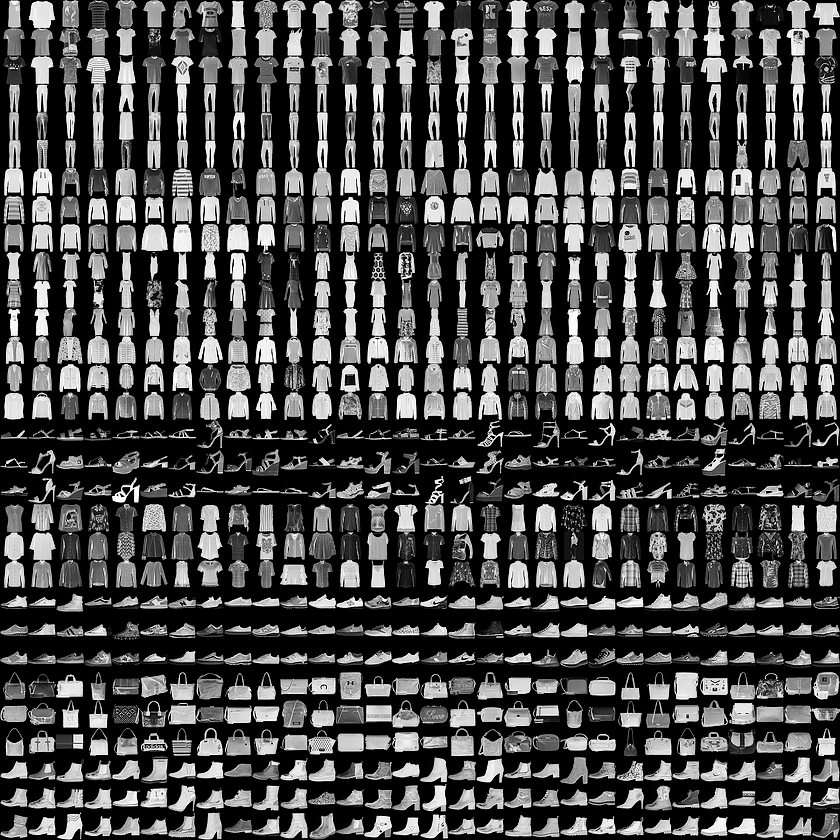






1. **LeNet-5:** This classic architecture is chosen for its simplicity and effectiveness on smaller datasets like Fashion MNIST. LeNet-5 comprises convolutional and pooling layers followed by fully-connected layers, making it suitable for basic image classification tasks within the constraints of Colab's computational resources. Two convolutional layers followed by max-pooling layers, and then fully-connected layers with ReLU activation functions.

2. **VGG16:** Despite its deeper architecture, VGG16 is selected for its proven performance on similar tasks like CIFAR-10. While VGG16 may be prone to overfitting on smaller datasets, it offers a strong baseline for comparison within the Colab environment. Multiple convolutional blocks with 3x3 filters, followed by max-pooling layers and fully-connected layers with ReLU activation functions. Dropout layers are added to mitigate overfitting.

3. **ResNet-18:** ResNet-18 is included for its residual connections, which help mitigate the vanishing gradient problem. Its architecture, featuring multiple residual blocks with shortcut connections, is expected to provide stable training and good accuracy even within the resource constraints of Colab. Residual blocks with shortcut connections, followed by global average pooling and a dense layer with softmax activation for classification.

4. **MobileNetV2:** MobileNetV2 is chosen as a lightweight architecture optimized for mobile devices. With depthwise separable convolutions and inverted residual blocks, it offers efficiency without compromising on accuracy, making it suitable for deployment in resource-constrained environments like Colab. Depthwise separable convolutions and inverted residual blocks, ending with a global average pooling layer and a dense layer with softmax activation.





## Import Packages & Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, datasets
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, load_model
from keras.applications import VGG16, ResNet50, MobileNetV2

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

from IPython.display import Image
from keras.utils import plot_model

print(tf.__version__)

2.15.0


## Parameters

In [16]:
size = (32, 32)
epochs = 3 #@param {type: "number"}
batch_size = 128

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Dataset Loading & Pre-processing

In [3]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to images
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


# Resize images to (32, 32)
train_images = tf.image.resize(train_images, size)
test_images = tf.image.resize(test_images, size)

4422102/4422102 [==============================] - 0s 0us/step


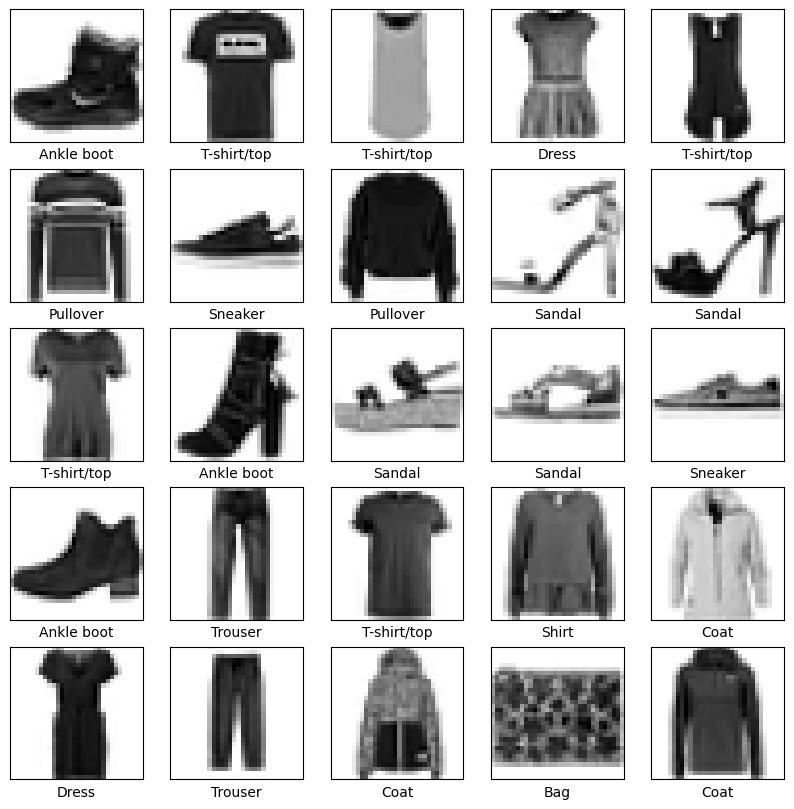

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Architecture Definitions

In [5]:
# Define LeNet-5 architecture
def LeNet5():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10)
    ])
    return model

# Define VGG16 architecture
def VGG16Model():
    base_model = VGG16(weights=None, input_shape=(32, 32, 1), include_top=False)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Define ResNet-18 architecture
def ResNet18():
    base_model = ResNet50(weights=None, input_shape=(32, 32, 1), include_top=False)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    return model

# Define MobileNetV2 architecture
def MobileNetV2Model():
    base_model = MobileNetV2(weights=None, input_shape=(32, 32, 1), include_top=False)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(10, activation='softmax')
    ])
    return model

## Helper Functions

In [6]:
# Compile and train the model
def train_model(name, model, train_images, train_labels, test_images, test_labels, epochs=epochs, batch_size=batch_size):
    if name == 'ResNet-18' or name == 'MobileNetV2':
        from_logits = False
    else:
        from_logits = True
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=from_logits),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))
    return history

# Evaluate model
def evaluate_model(name, model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy of {name}: ", test_acc)

In [7]:
# Confusion matrix
def plot_confusion_matrix(ax, model_name, y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    im = ax.imshow(cm, interpolation='nearest', cmap='Pastel2')
    ax.set_title(f'Confusion Matrix of {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_names)
    width, height = cm.shape
    for x in range(width):
        for y in range(height):
            ax.text(y, x, str(cm[x][y]), horizontalalignment='center', verticalalignment='center')

    # Add color bar on the right side
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel('Counts', rotation=-90, va='bottom')


In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  confidence = 100 * np.max(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                confidence,
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10), rotation=90)
  plt.yticks([])
  thisplot = plt.bar(class_names, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

In [9]:
def model_to_image(name, model):
  plot_model(model, show_shapes=True, to_file=f'{name}.png')
  return f'{name}.png'

## Architecutures List

In [10]:
# Load model architectures
models = [LeNet5(), VGG16Model(), ResNet18(), MobileNetV2Model()]
model_names = ['LeNet-5', 'VGG16', 'ResNet-18', 'MobileNetV2']



## Model training

In [11]:
trained_history = []
# Train and evaluate models
for model, name in zip(models, model_names):
    print("-" * 40+f"START OF TRANING {name}"+"-" * 40)
    history = train_model(name, model, train_images, train_labels, test_images, test_labels)
    evaluate_model(name, model, test_images, test_labels)
    trained_history.append(history)
    print("-" * 40+f"END OF TRANING {name}"+"-" * 40)
    print("")





----------------------------------------START OF TRANING LeNet-5----------------------------------------
Epoch 1/25
469/469 [==============================] - 6s 5ms/step - loss: 0.6290 - accuracy: 0.7765 - val_loss: 0.4874 - val_accuracy: 0.8279
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4095 - accuracy: 0.8531 - val_loss: 0.3842 - val_accuracy: 0.8618
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3583 - accuracy: 0.8704 - val_loss: 0.3681 - val_accuracy: 0.8664
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3249 - accuracy: 0.8825 - val_loss: 0.3299 - val_accuracy: 0.8813
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3035 - accuracy: 0.8903 - val_loss: 0.3242 - val_accuracy: 0.8805
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.2859 - accuracy: 0.8953 - val_loss: 0.3110 - val_accuracy: 0.8883
Epoch 7/25
469/469 [=======================

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?



469/469 [==============================] - 42s 68ms/step - loss: 2.3034 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/25
469/469 [==============================] - 25s 54ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/25
469/469 [==============================] - 25s 53ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/25
469/469 [==============================] - 25s 53ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/25
469/469 [==============================] - 26s 54ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/25
469/469 [==============================] - 26s 55ms/step - loss: 2.3027 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/25
469/469 [==============================] - 25s 54ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epo

## Model Validation & Testing


### Accuracy & Loss during Training & Validation

In [12]:

def create_trace(x, y, ylabel, color):
    trace = go.Scatter(
        x=x,
        y=y,
        name=ylabel,
        marker=dict(color=color),
        mode="markers+lines",
        text=x
    )
    return trace

def plot_accuracy_and_loss(name, train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation loss", "Magenta")

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))

    fig.append_trace(trace_ta, 1, 1)
    fig.append_trace(trace_va, 1, 1)
    fig.append_trace(trace_tl, 1, 2)
    fig.append_trace(trace_vl, 1, 2)
    fig['layout']['xaxis'].update(title='Epoch')
    fig['layout']['xaxis2'].update(title='Epoch')
    fig['layout']['yaxis'].update(title='Accuracy')
    fig['layout']['yaxis2'].update(title='Loss')

    fig.update_layout(title_text=f'{name}')
    iplot(fig, filename='accuracy-loss')

for name, history in zip(model_names, trained_history):
    plot_accuracy_and_loss(name, history)


### Confusion Matrices

313/313 [==============================] - 2s 5ms/step


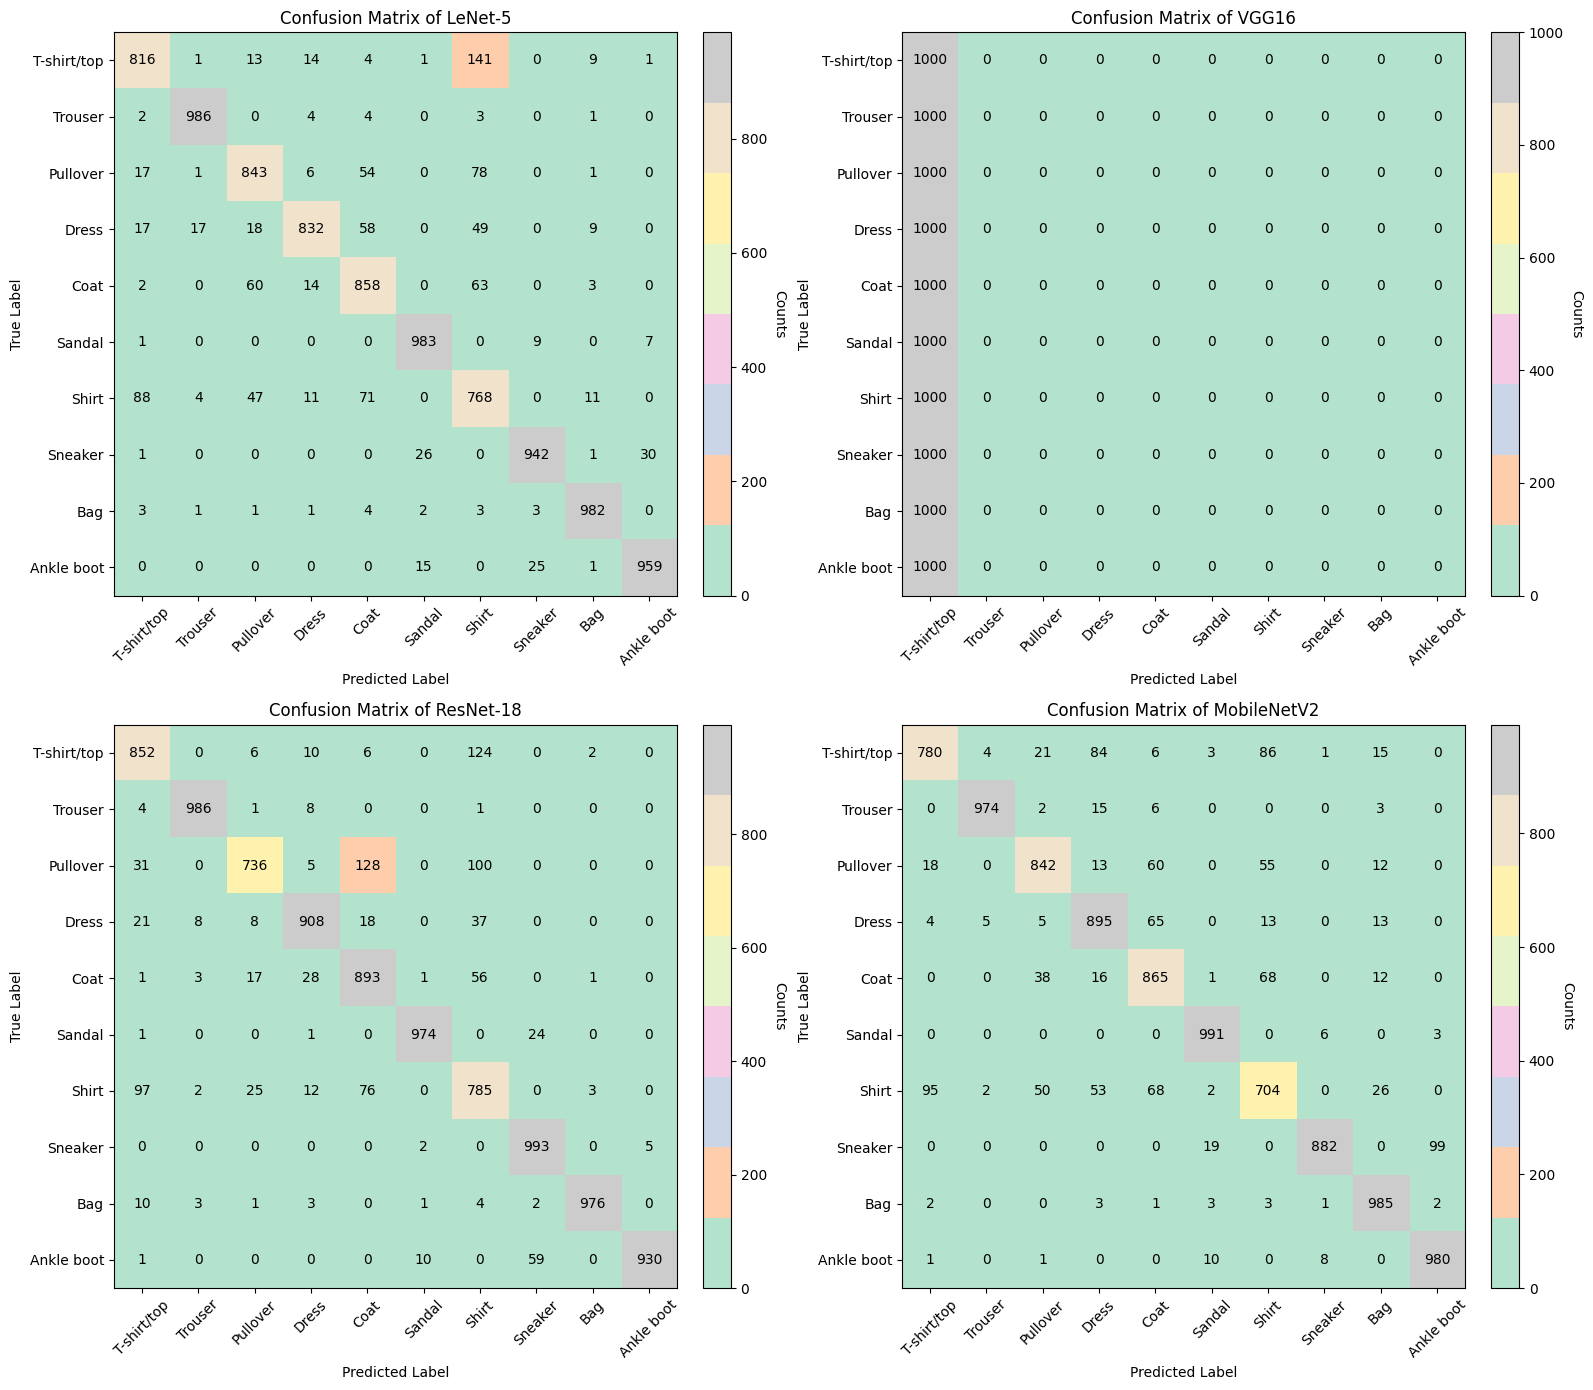

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for model, name, history, ax in zip(models, model_names, trained_history, axes.flatten()):
    # Confusion matrix
    predictions = np.argmax(model.predict(test_images), axis=1)
    plot_confusion_matrix(ax, name, test_labels, predictions, class_names)


plt.tight_layout()
plt.show()

### Verify predictions

313/313 [==============================] - 2s 5ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

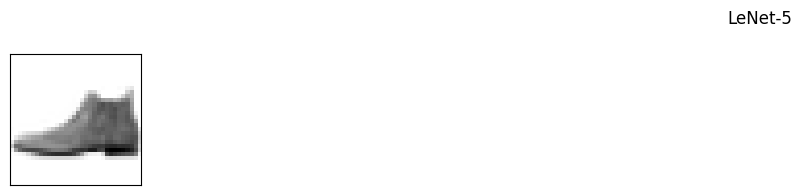

In [35]:
for model, name, history in zip(models, model_names, trained_history):
    predictions = model.predict(test_images)
    num_rows = 2
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    plt.suptitle(name)
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()

         Model  Accuracy  Validation Accuracy      Loss  Validation Loss
0      LeNet-5  0.948150               0.8969  0.135725         0.315349
1        VGG16  0.098900               0.1000  2.302685         2.302599
2    ResNet-18  0.954683               0.9033  0.119663         0.282811
3  MobileNetV2  0.953633               0.8898  0.129318         0.523934


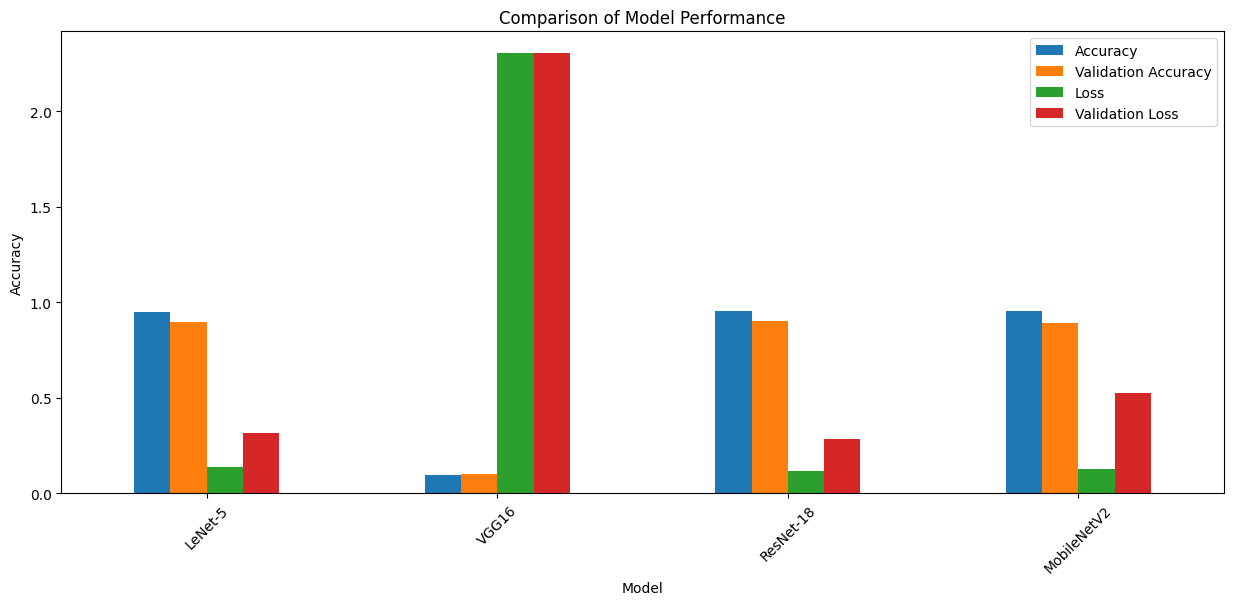

In [15]:
metrics = []
for name, history in zip(model_names, trained_history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    metrics.append({'Model': name, 'Accuracy': acc[-1], 'Validation Accuracy': val_acc[-1], 'Loss': loss[-1], 'Validation Loss': val_loss[-1]})

# Create DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)

# Plot a bar chart comparing accuracy and validation accuracy
metrics_df.plot(x='Model', y=['Accuracy', 'Validation Accuracy', 'Loss', 'Validation Loss'], kind='bar', figsize=(15, 6))
plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()